#### Import the required modules

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

#### Import data and check its integrity

In [0]:
#Load the dataset
df=pd.read_csv('diabetes.csv')
#print the first 5 rows to take a look at the data using the head function
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
#let´s take a look at the shape our data has
df.shape

(768, 9)

In [0]:
#Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values
print(str(X.shape)+' '+str(y.shape))

(768, 8) (768,)


In [0]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

Data preparation for KNN analysis. Separation intro training and test data

In [0]:
#Import the module for splitting data from sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

##### Create and run the model

In [0]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies. We are going to test the accuracy by using 1 to 25 neighbors
#for classification
neighbors = np.arange(1,100) #Creo un vector de 1 a 25
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


In [0]:
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [0]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    

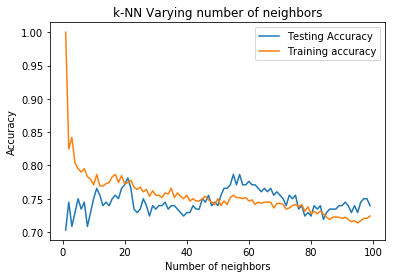

In [0]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [0]:
#Setup a knn classifier with the best number of neighbors
knn = KNeighborsClassifier(n_neighbors=21)

#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

##### Measure accuracy of our classification methodology

In [0]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.78125

In [0]:
#We can create a confusion matrix to better observe the accuracy of our method. Using the crosstab function
y_pred = knn.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,123,11,134
1,31,27,58
All,154,38,192


### Let's try to use a random forest, in this example a classifier, to generate the model for this data

In [0]:
from sklearn.ensemble import RandomForestClassifier

forest_cla = RandomForestClassifier()
forest_cla.fit(X_train,y_train)
forest_train_predicted_values=forest_cla.predict(X_train)

C:\Users\joan.fernandez\AppData\Local\Continuum\anaconda3\envs\Neural_networks\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


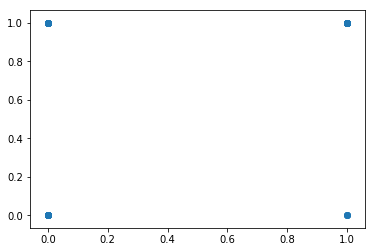

In [0]:
plt.scatter(forest_train_predicted_values,y_train)

In [0]:
forest_test_predicted=forest_cla.predict(X_test)
table=pd.crosstab(y_test, forest_test_predicted, rownames=['True'], colnames=['Predicted'], margins=True)


In [0]:
pd.crosstab(y_test, forest_test_predicted, rownames=['True'], colnames=['Predicted'], margins=True).apply(lambda r: r/len(df), axis=0)

Predicted,0,1,All
True,,,
0,0.156250,0.018229,0.174479
1,0.045573,0.029948,0.075521
All,0.201823,0.048177,0.250000


In [0]:
table / table.sum(axis=0, level=0)

Predicted,0,1,All
True,,,
0,1.0,1.0,1.0
1,1.0,1.0,1.0
All,1.0,1.0,1.0
